# Satellite Variation vs. Temp

- Use these scripts to analyze how satellites vary with temp

## First we have our octagon satellites

In [223]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import os

In [225]:
os.chdir('C:/Users/Jacob/Shoemaker_Data/Ta2Se8I_Data/Octagon_Satellite_HK_planes/')
data = np.genfromtxt('30K_Values.csv', delimiter=',')
y = data[1:,1:2]

In [227]:
# loading in the data
# we take the max value from these slices

values = np.array([])
temps =  ['30','60','90','120','160','180','220','240','270','300']
for i in temps:
    data = np.genfromtxt(i+'K_Values.csv', delimiter=',')
    y = data[1:,1:2]
    values = np.append(values, max(y))

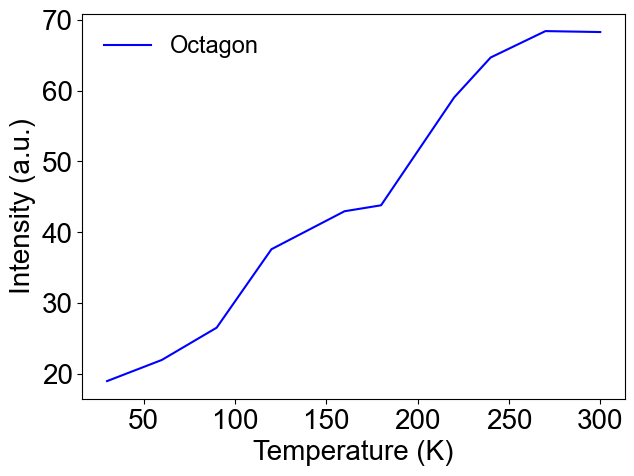

In [228]:
# now plot

temps = np.asarray(temps,dtype=float)
matplotlib.rcParams['font.sans-serif'] = "arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (7,5)

plt.xlabel('Temperature (K)')
plt.ylabel('Intensity (a.u.)')
plt.plot(temps,values,color='b',label='Octagon')
plt.legend(numpoints=1,frameon=False,fontsize=17)

## And now our CDW satellites

In [229]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import os

In [231]:
os.chdir('C:/Users/Jacob/Shoemaker_Data/Ta2Se8I_Data/CDW_Satellite_HK_planes/')
data1 = np.genfromtxt('30K_Values.csv', delimiter=',')
y1 = data1[1:,1:2]

In [233]:
values1 = np.array([])
temps1 =  ['30','60','90','130','160','180','220','240','270','300']
for i in temps1:
    data1 = np.genfromtxt(i+'K_Values.csv', delimiter=',')
    y1 = data1[1:,1:2]
    values1 = np.append(values1, max(y1))

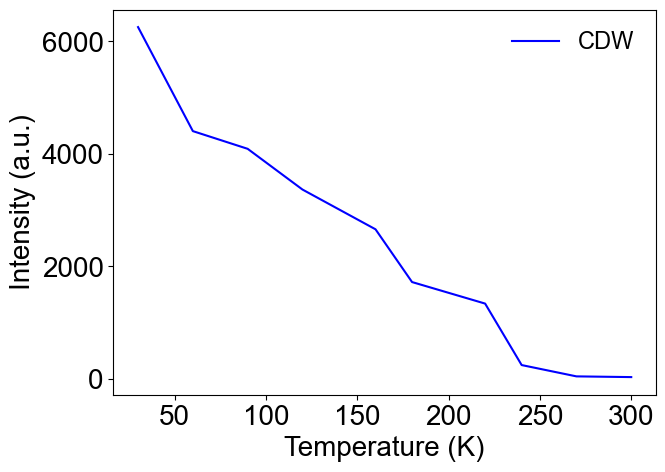

In [234]:
temps1 = np.asarray(temps,dtype=float)
matplotlib.rcParams['font.sans-serif'] = "arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (7,5)

plt.xlabel('Temperature (K)')
plt.ylabel('Intensity (a.u.)')
plt.plot(temps1,values1,color='b',label='CDW')
plt.legend(numpoints=1,frameon=False,fontsize=17)

## Here are both on same plot

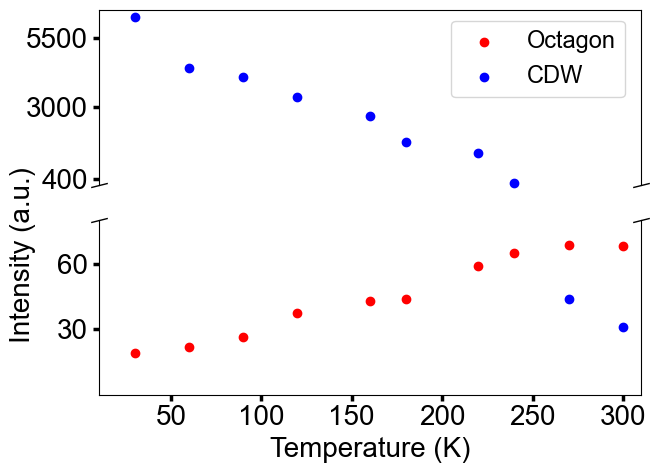

In [235]:
from matplotlib.gridspec import GridSpec

matplotlib.rcParams['font.sans-serif'] = "arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (7,5)

fig = plt.figure()
gs = GridSpec(2, 2, height_ratios=[6, 6])
ax = fig.add_subplot(gs.new_subplotspec((0, 0), colspan=2))
ax1 = fig.add_subplot(gs.new_subplotspec((1, 0), colspan=2))

#fig, (ax, ax1) = plt.subplots(2, 1, sharex=True)

#ax1.plot(x1,y1,'red',x2,y2,'blue')
ax1.scatter(temps,values,c='red',label='Octagon')
ax1.scatter(temps1,values1,c='blue',label='CDW')
ax.scatter(temps1[0:len(temps1)-2],values1[0:len(values1)-2],c='blue',label='CDW',clip_on=False)

ax.set_ylim(180,6500)  # outliers only
ax.set_xlim(10,310)  # outliers only
ax1.set_ylim(0, 80)  # most of the data 
ax1.set_xlim(10, 310)  # most of the data 

ax1.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax1.spines['top'].set_visible(False)
#ax1.spines['right'].set_visible(False)
#ax1.spines['bottom'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax1.xaxis.tick_bottom()
ax.get_xaxis().set_visible(False)
#ax1.get_xaxis().set_visible(False)


ax.set_yticks([400,3000,5500])
ax1.set_yticks([30,60])
#ax.set_yticklabels([1.0])

d = .25  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax.plot([0], [0], transform=ax.transAxes, **kwargs)
ax1.plot([0], [1], transform=ax1.transAxes, **kwargs)
ax.plot([1], [0], transform=ax.transAxes, **kwargs)
ax1.plot([1], [1], transform=ax1.transAxes, **kwargs)

ax1.set_ylabel('Intensity (a.u.)')
ax1.yaxis.set_label_coords(-0.115, 0.8)
plt.xlabel('Temperature (K)')

ax1.legend(numpoints=1,loc=[0.65,1.7],frameon=True,fontsize=17)

ax.tick_params('both', length=4, width=2.5, which='major')
ax1.tick_params('both', length=4, width=2.5, which='major')

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

#plt.show()

#plt.savefig('C:/Users/Jacob/Shoemaker_data/Ta2Se8I_Data/Figures/Tsi_Satellite_Temp.png',dpi=350,bbox_inches = 'tight', pad_inches = .018)

## Plot with two y axes

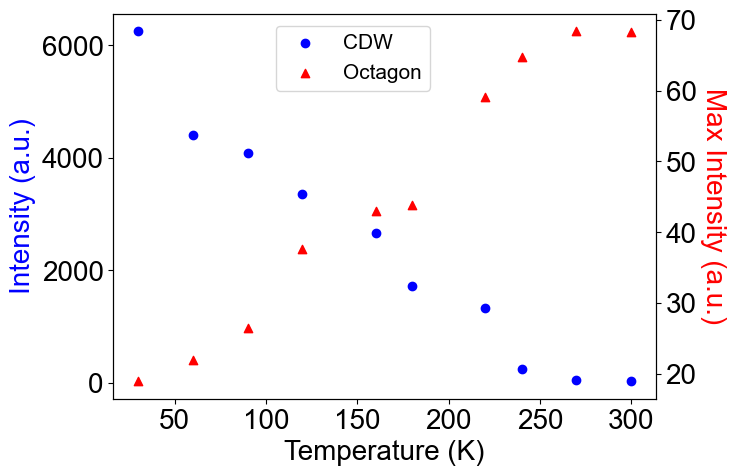

In [236]:
from matplotlib.gridspec import GridSpec

matplotlib.rcParams['font.sans-serif'] = "arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (7,5)

fig, ax = plt.subplots(1,1)

plot = ax.scatter(temps1,values1,c='blue',label='CDW')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Intensity (a.u.)',c='blue')

ax1 = ax.twinx()
plot1 = ax1.scatter(temps,values,c='red',label='Octagon',marker='^')
ax1.set_ylabel('Max Intensity (a.u.)',c='red',rotation=270)
ax1.yaxis.set_label_coords(1.13, 0.5)
ax1.legend(numpoints=1,loc=[0.65,1.7],frameon=False,fontsize=17)


lines, labels = ax.get_legend_handles_labels()
lines1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(lines + lines1, labels + labels1, loc=[0.3,0.8],fontsize=15)
#ax1.set_aspect(2)
#plt.savefig('C:/Users/Jacob/Shoemaker_data/Ta2Se8I_Data/Figures/Tsi_Satellite_Temp.png',dpi=170,bbox_inches = 'tight', pad_inches = .018)

# Octagon satellite position variation with temp

- The octagon satellites tend to change position with temp, here we try to plot it

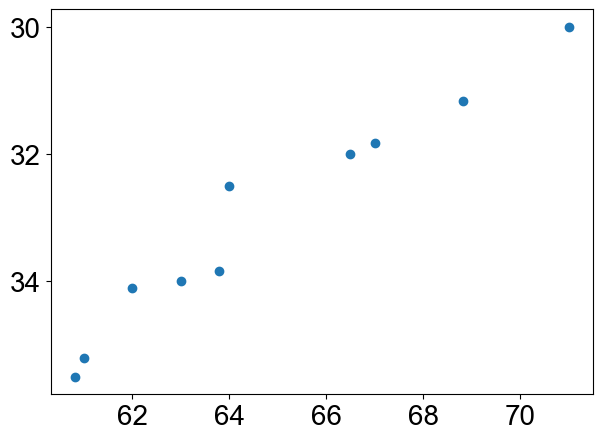

In [130]:
# these values found in imageJ, by tracking the max intensities of satellites

x = np.array([71,68.83,67,66.5,64,63.8,63,62,61,60.83])
y = np.array([30,31.17,31.83,32,32.5,33.83,34,34.1,35.2,35.5])
fig, ax = plt.subplots(1,1)
ax.scatter(x,y)
ax.invert_yaxis()
plt.savefig('C:/Users/Jacob/Shoemaker_data/Ta2Se8I_Data/Figures/Tsi_Satellite_kvector.png',dpi=350,bbox_inches = 'tight', pad_inches = .018)

# Plots for the integrated intensities

- We would like to get integrated intensities as well as the max intensities found earlier, above

In [131]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import os
from scipy.integrate import simps
import sympy

- Let's start with CDW satellites

In [132]:
os.chdir('C:/Users/Jacob/Shoemaker_Data/Ta2Se8I_Data/CDW_Satellite_HK_planes/')

In [134]:
# here we took square, 2D slices through the satellites
# we will integrate these
# here is an example at one temp...

data = np.genfromtxt('200K_xy_values.csv', delimiter=',')
x = data[1:,0:1]
y = data[1:,1:2]
z = data[1:,2:3]

In [137]:
# now we will load in and integrate all
# we just sum up all of the values within each slice
# since the resolutions are all the same among slices, we don't need to worry about multiplying by that
# it just scales everything a bit different

values3 = np.array([])
temps3 =  ['40','80','90','120','130','160','180','200','220','240','270','300']
for i in temps3:
    data = np.genfromtxt(i+'K_xy_values_3.csv', delimiter=',')
    z = data[1:,2:3]
    sumz = np.sum(z)
    values3 = np.append(values3, sumz)

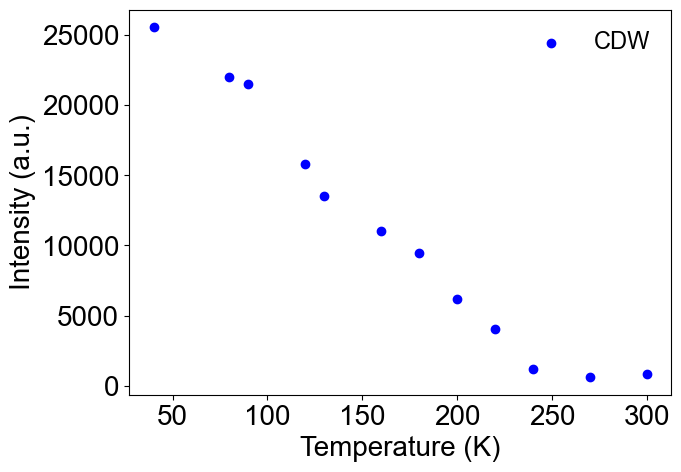

In [192]:
# plotting our CDW satellites...

temps3 = np.asarray(temps3,dtype=float)
matplotlib.rcParams['font.sans-serif'] = "arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (7,5)

plt.xlabel('Temperature (K)')
plt.ylabel('Intensity (a.u.)')
plt.scatter(temps3,values3,color='b',label='CDW')
plt.legend(numpoints=1,frameon=False,fontsize=17)

- And now here we do the octagon satellites

In [139]:
os.chdir('C:/Users/Jacob/Shoemaker_Data/Ta2Se8I_Data/Octagon_Satellite_HK_planes/')

In [140]:
values2 = np.array([])
temps2 =  ['40','80','90','120','130','160','180','200','220','240','270','300']
for i in temps2:
    data = np.genfromtxt(i+'K_Values_integrated.csv', delimiter=',')
    z = data[1:,2:3]
    sumz = np.sum(z)
    values2 = np.append(values2, sumz)

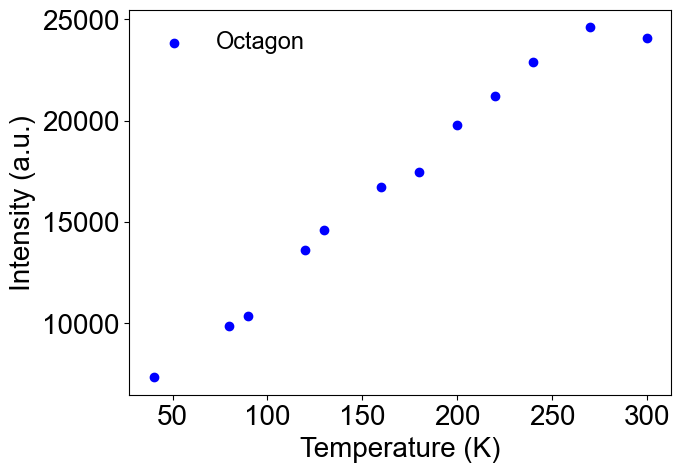

In [193]:
temps2 = np.asarray(temps2,dtype=float)
matplotlib.rcParams['font.sans-serif'] = "arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (7,5)

plt.xlabel('Temperature (K)')
plt.ylabel('Intensity (a.u.)')
plt.scatter(temps2,values2,color='b',label='Octagon')
plt.legend(numpoints=1,frameon=False,fontsize=17)

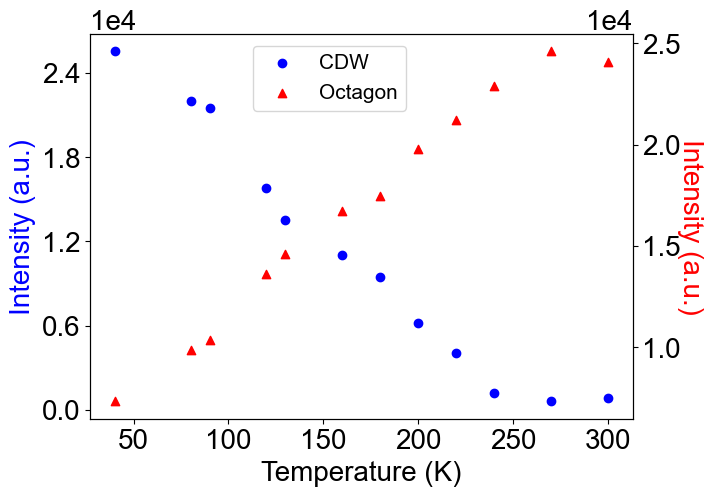

In [194]:
# we can plot both together with two different y axes
# however, CDW and Octagon satellites have very similar values
# so two different y axes don't really do much for us

from matplotlib.gridspec import GridSpec

matplotlib.rcParams['font.sans-serif'] = "arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (7,5)

fig, ax = plt.subplots(1,1)

plot = ax.scatter(temps3,values3,c='blue',label='CDW')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Intensity (a.u.)',c='blue')

ax1 = ax.twinx()
plot1 = ax1.scatter(temps2,values2,c='red',label='Octagon',marker='^')
ax1.set_ylabel('Intensity (a.u.)',c='red',rotation=270)
ax1.yaxis.set_label_coords(1.13, 0.5)
ax1.legend(numpoints=1,loc=[0.65,1.7],frameon=False,fontsize=17)


lines, labels = ax.get_legend_handles_labels()
lines1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(lines + lines1, labels + labels1, loc=[0.3,0.8],fontsize=15)

ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax1.yaxis.set_major_locator(plt.MaxNLocator(4))

#ax1.set_aspect(2)
#plt.savefig('C:/Users/Jacob/Shoemaker_data/Ta2Se8I_Data/Figures/Tsi_Satellite_Temp.png',dpi=170,bbox_inches = 'tight', pad_inches = .018)

(0.0, 34500.0)

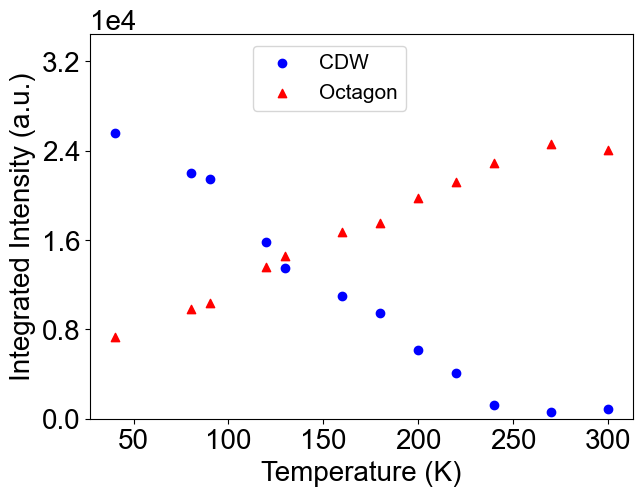

In [195]:
from matplotlib.gridspec import GridSpec

matplotlib.rcParams['font.sans-serif'] = "arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (7,5)

fig, ax = plt.subplots(1,1)

plot = ax.scatter(temps3,values3,c='blue',label='CDW')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Integrated Intensity (a.u.)')

plot1 = ax.scatter(temps2,values2,c='red',label='Octagon',marker='^')

ax.legend(loc=[0.3,0.8],fontsize=15)

ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax.yaxis.set_major_locator(plt.MaxNLocator(5))

ax.set_ylim(0,34500)


#ax1.set_aspect(2)
#plt.savefig('C:/Users/Jacob/Shoemaker_data/Ta2Se8I_Data/Figures/Tsi_integrated_Temp.png',dpi=170,bbox_inches = 'tight', pad_inches = .018)

# Now doing both max intensity and integrated intensities together

- We would like to demonstrate that the octagon satellites are much lower intensity, harder to resolve
- The integrated intensities don't really communicate that, seeing the values are comparable between CDW and Octagon
- Therefore, we can also show the max intensities as plotted at the beginning of the notebook

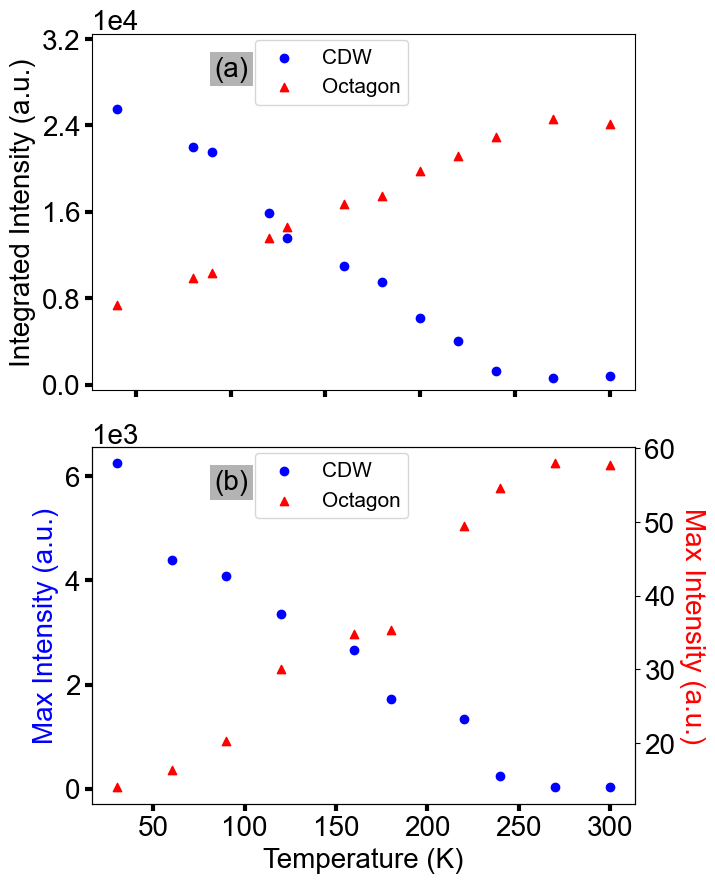

In [196]:
from matplotlib.gridspec import GridSpec
import matplotlib.transforms as mtransforms

matplotlib.rcParams['font.sans-serif'] = "arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (7,10)

fig, ax = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.16)

plot = ax[0].scatter(temps3,values3,c='blue',label='CDW')
ax[0].set_xlabel('Temperature (K)')
ax[0].set_ylabel('Integrated Intensity (a.u.)')

plot1 = ax[0].scatter(temps2,values2,c='red',label='Octagon',marker='^')

ax[0].legend(loc=[0.3,0.8],fontsize=15)

ax[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[0].yaxis.set_major_locator(plt.MaxNLocator(5))

ax[0].set_ylim(-500,32500)
#ax[1].set_ylim(-150,7500)

plot = ax[1].scatter(temps1,values1,c='blue',label='CDW')
ax[1].set_xlabel('Temperature (K)')
ax[1].set_ylabel('Max Intensity (a.u.)',c='blue')

ax1 = ax[1].twinx()
plot1 = ax1.scatter(temps,values,c='red',label='Octagon',marker='^')
ax1.set_ylabel('Max Intensity (a.u.)',c='red',rotation=270)
ax1.yaxis.set_label_coords(1.13, 0.5)
ax1.legend(numpoints=1,loc=[0.65,1.7],frameon=False,fontsize=17)
ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

lines, labels = ax[1].get_legend_handles_labels()
lines1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(lines + lines1, labels + labels1, loc=[0.3,0.8],fontsize=15)

trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax[0].text(0.0, 1.0, '(a)', transform=ax[0].transAxes + trans,
        fontsize=20, position=(0.2,0.9),
        bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))
ax[1].text(0.0, 1.0, '(b)', transform=ax[1].transAxes + trans,
        fontsize=20, position=(0.2,0.9),
        bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))

ax[0].tick_params('both', length=5, width=3, which='major')
ax[1].tick_params('both', length=5, width=3, which='major')

for ax in ax.flat:
    ax.label_outer()
    
#plt.savefig('C:/Users/Jacob/Shoemaker_data/Ta2Se8I_Data/Figures/Tsi_Satellite_Temp.png',dpi=170,bbox_inches = 'tight', pad_inches = .018)

# Background subtraction

- So, now we would like to background subtract our values here

In [145]:
# we can use astropy, which is great for subtracting off noise (as they do for astronomical images)

from astropy.stats import SigmaClip
from photutils.background import Background2D, MedianBackground

In [146]:
os.chdir('C:/Users/Jacob/Shoemaker_Data/Ta2Se8I_Data/Octagon_Satellite_HK_planes/')

In [147]:
data_test = np.genfromtxt('300K.csv', delimiter=',')
sigma_clip = SigmaClip(sigma=3.0)
bkg_estimator = MedianBackground()
bkg = Background2D(data_test, (200, 200), filter_size=(3, 3),
                   sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)

In [148]:
print(bkg.background_median) 

31.470119953153198


In [149]:
print(bkg.background_rms_median)

16.223785434290043


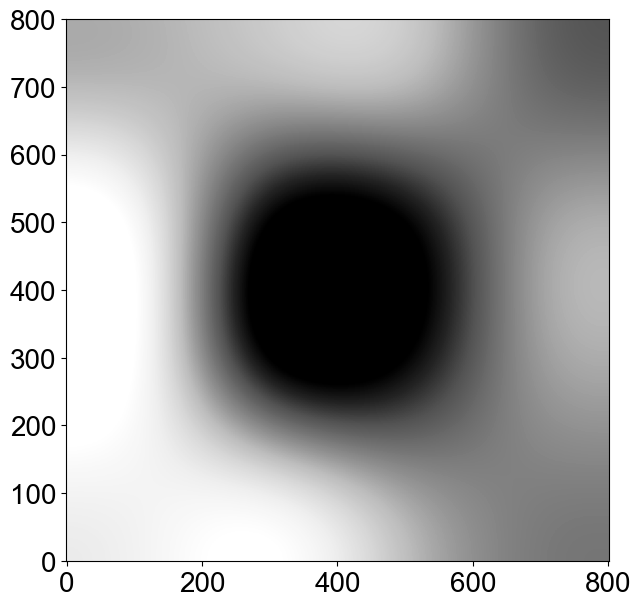

In [150]:
# here we show a background intensity map for one of our slices

plt.imshow(bkg.background, origin='lower', cmap='Greys_r',
           interpolation='nearest')

np.savetxt('C:/Users/Jacob/Shoemaker_Data/Ta2Se8I_Data/Octagon_Satellite_HK_planes/background.csv',bkg.background,delimiter=",")

In [151]:
# you can index this map for specific values

bkg.background[518,214]

30.365462877091783

In [152]:
# so now we go through each temperature for our slices
# we load in the data, and find the background values
# then we take the value at the location of the satellite we are interested in
# and save that value to subtract off our intensity

# we start with CDW background values

os.chdir('C:/Users/Jacob/Shoemaker_Data/Ta2Se8I_Data/CDW_Satellite_HK_planes/')
background_values_cdw = np.array([])
background_temps =  ['40','80','90','120','130','160','180','200','220','240','270','300']
for i in background_temps:
    data_test = np.genfromtxt(i+'K_highres_large.csv', delimiter=',')
    sigma_clip = SigmaClip(sigma=3.0)
    bkg_estimator = MedianBackground()
    bkg = Background2D(data_test, (90, 90), filter_size=(3, 3),
                   sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)
    background_values_cdw = np.append(background_values_cdw, bkg.background[2258,261])

In [153]:
background_values_cdw

array([3.03016803, 3.13306656, 2.92939191, 3.31420158, 3.17858994,
       3.40914809, 3.45187342, 3.38012968, 3.41955168, 3.56865734,
       3.50849825, 3.56521445])

In [154]:
os.chdir('C:/Users/Jacob/Shoemaker_Data/Ta2Se8I_Data/CDW_Satellite_HK_planes/')
background_values_cdw_max = np.array([])
background_temps =  ['30','60','90','130','160','180','220','240','270','300']
for i in background_temps:
    data_test = np.genfromtxt(i+'K_highres_large.csv', delimiter=',')
    sigma_clip = SigmaClip(sigma=3.0)
    bkg_estimator = MedianBackground()
    bkg = Background2D(data_test, (90, 90), filter_size=(3, 3),
                   sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)
    background_values_cdw_max = np.append(background_values_cdw_max, bkg.background[2258,261])

In [155]:
background_values_cdw_max

array([2.98809364, 3.0335035 , 2.92939191, 3.17858994, 3.40914809,
       3.45187342, 3.41955168, 3.56865734, 3.50849825, 3.56521445])

In [156]:
# here are the octagon background values I found...

background_values_octagon = np.array([5.3,5.9,6.2,7.2,7.5,8.2,8.4,9.3,9.6,10.1,10.4,10.5])
background_values_octagon_max = np.array([5,5.7,6.2,7.5,8.2,8.4,9.6,10.1,10.4,10.5])

- Now, we go through and subtract off the background values from our intensities before plotting

In [157]:
# for the max intensities of the octagon satellites...

os.chdir('C:/Users/Jacob/Shoemaker_Data/Ta2Se8I_Data/Octagon_Satellite_HK_planes/')
values = np.array([])
temps =  ['30','60','90','120','160','180','220','240','270','300']
a = 0
for i in temps:
    data = np.genfromtxt(i+'K_Values.csv', delimiter=',')
    y = data[1:,1:2] - background_values_octagon_max[a]
    a = a + 1
    values = np.append(values, max(y))

In [158]:
# for the max intensities of the CDW satellites...

os.chdir('C:/Users/Jacob/Shoemaker_Data/Ta2Se8I_Data/CDW_Satellite_HK_planes/')
values1 = np.array([])
temps1 =  ['30','60','90','130','160','180','220','240','270','300']
a=0
for i in temps1:
    data1 = np.genfromtxt(i+'K_Values.csv', delimiter=',')
    y1 = data1[1:,1:2] - background_values_cdw_max[a]
    a = a+1
    values1 = np.append(values1, max(y1))

In [159]:
# for the integrated intensities of the CDW...

os.chdir('C:/Users/Jacob/Shoemaker_Data/Ta2Se8I_Data/CDW_Satellite_HK_planes/')
values3 = np.array([])
temps3 =  ['40','80','90','120','130','160','180','200','220','240','270','300']
a = 0
for i in temps3:
    data = np.genfromtxt(i+'K_xy_values_3.csv', delimiter=',')
    z = data[1:,2:3] - background_values_cdw[a]
    a = a+1
    sumz = np.sum(z)
    values3 = np.append(values3, sumz)

In [160]:
# for the integrated values of the octagon...

os.chdir('C:/Users/Jacob/Shoemaker_Data/Ta2Se8I_Data/Octagon_Satellite_HK_planes/')
values2 = np.array([])
temps2 =  ['40','80','90','120','130','160','180','200','220','240','270','300']
a = 0
for i in temps2:
    data = np.genfromtxt(i+'K_Values_integrated.csv', delimiter=',')
    z = data[1:,2:3] - background_values_octagon[a]
    a = a+1
    sumz = np.sum(z)
    values2 = np.append(values2, sumz)

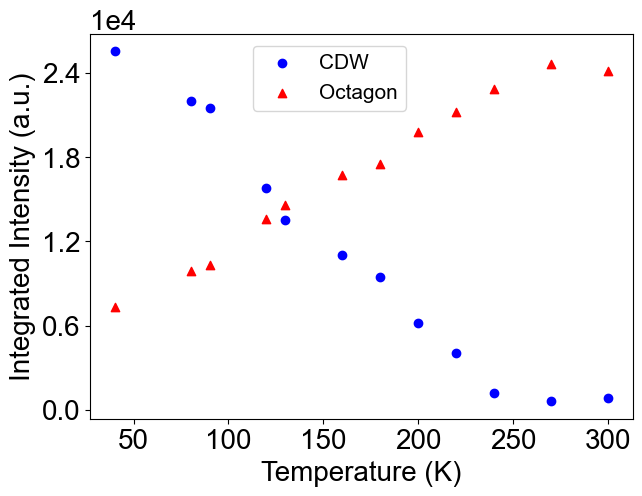

In [197]:
# finally, we go ahead and plot
# here are the integrated intensities, background subtracted

from matplotlib.gridspec import GridSpec

matplotlib.rcParams['font.sans-serif'] = "arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (7,5)

fig, ax = plt.subplots(1,1)

plot = ax.scatter(temps3,values3,c='blue',label='CDW')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Integrated Intensity (a.u.)')

plot1 = ax.scatter(temps2,values2,c='red',label='Octagon',marker='^')

ax.legend(loc=[0.3,0.8],fontsize=15)

ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax.yaxis.set_major_locator(plt.MaxNLocator(5))



#ax1.set_aspect(2)
#plt.savefig('C:/Users/Jacob/Shoemaker_data/Ta2Se8I_Data/Figures/Tsi_integrated_Temp.png',dpi=170,bbox_inches = 'tight', pad_inches = .018)

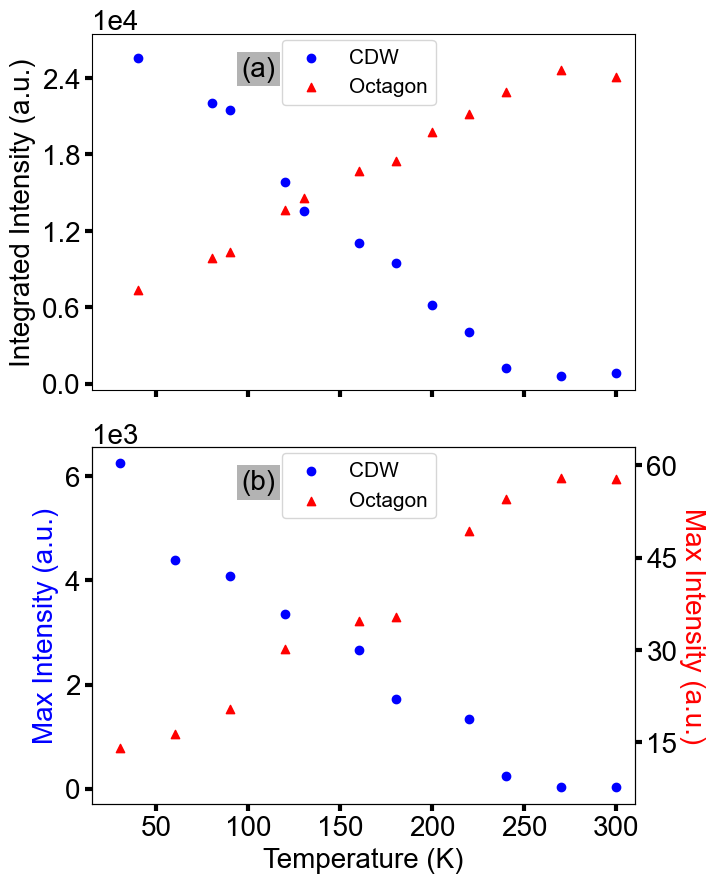

In [222]:
# and here are both max and integrated intensities...

from matplotlib.gridspec import GridSpec
import matplotlib.transforms as mtransforms

temps = np.asarray(temps,dtype=float)
temps1 = np.asarray(temps1,dtype=float)
temps2 = np.asarray(temps2,dtype=float)
temps3 = np.asarray(temps3,dtype=float)

matplotlib.rcParams['font.sans-serif'] = "arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (7,10)

fig, ax = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.16)

plot = ax[0].scatter(temps3,values3,c='blue',label='CDW')
ax[0].set_xlabel('Temperature (K)')
ax[0].set_ylabel('Integrated Intensity (a.u.)')

plot1 = ax[0].scatter(temps2,values2,c='red',label='Octagon',marker='^')

ax[0].legend(loc=[0.35,0.8],fontsize=15)

ax[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[0].yaxis.set_major_locator(plt.MaxNLocator(5))

ax[0].set_ylim(-500,27500)
ax[0].set_xlim(15,310)
ax[1].set_xlim(15,310)
#ax[1].set_ylim(-150,7500)

plot = ax[1].scatter(temps1,values1,c='blue',label='CDW')
ax[1].set_xlabel('Temperature (K)')
ax[1].set_ylabel('Max Intensity (a.u.)',c='blue')

ax1 = ax[1].twinx()
plot1 = ax1.scatter(temps,values,c='red',label='Octagon',marker='^')
ax1.set_ylabel('Max Intensity (a.u.)',c='red',rotation=270)
ax1.yaxis.set_label_coords(1.13, 0.5)
ax1.legend(numpoints=1,loc=[0.65,1.7],frameon=False,fontsize=17)
ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

lines, labels = ax[1].get_legend_handles_labels()
lines1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(lines + lines1, labels + labels1, loc=[0.35,0.8],fontsize=15)

trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax[0].text(0.0, 1.0, '(a)', transform=ax[0].transAxes + trans,
        fontsize=20, position=(0.25,0.9),
        bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))
ax[1].text(0.0, 1.0, '(b)', transform=ax[1].transAxes + trans,
        fontsize=20, position=(0.25,0.9),
        bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))

ax[0].tick_params('both', length=5, width=3, which='major')
ax[1].tick_params('both', length=5, width=3, which='major')
ax1.tick_params('both', length=5, width=3, which='major')
ax1.set_ylim(5,63)
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))

for ax in ax.flat:
    ax.label_outer()
    
plt.savefig('C:/Users/Jacob/Shoemaker_data/Ta2Se8I_Data/Figures/Tsi_Satellite_Temp.png',dpi=170,bbox_inches = 'tight', pad_inches = .018)